<a href="https://colab.research.google.com/github/Nomade25/Portifolio-e-Projetos-de-Estudos/blob/main/NSCallCenter_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Imports***

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model as lm



In this example we are going to show a simple linear regression to explain how much each inscrement of variable "wait time" (x variable) could affect the Service Level of call center (y variable). -- We know that this variable doesn't have great correlation, but we can explain part of the problem.

In [4]:
# load dataset
df_Nivel = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Arquivos/NivelSevico.xlsx") 

In [6]:
# read de features and data
df_Nivel.head()

,TME,NS
0,1729,0.654135
1,3449,0.358945
2,699,0.546495
3,507,0.850099
4,1992,0.785643


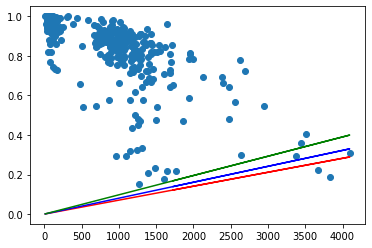

In [139]:
plt.scatter(df_Nivel['TME'],df_Nivel['NS'])
plt.plot(df_Nivel['TME'],yhat01, color ='red' )
plt.plot(df_Nivel['TME'],yhat02, color ='blue' )
plt.plot(df_Nivel['TME'],yhat03, color ='green' )

In [ ]:
#equation linear
# yhat = b0 + b1*x

In [137]:
# example of selection of manual ratio of yhat
X= df_Nivel['TME']
yhat01 = (-0.026 + 0.70481827 * X)/100/100
yhat02 = (-0.0378 + 0.80481827 * X)/100/100


# generate model with least square error
yhat03 = (-0.00016798 + 0.97481827 * X)/100/100

In [132]:
yhat01

0      0.168546
1      0.336215
2      0.068140
3      0.049423
4      0.194184
         ...   
300    0.014915
301    0.111909
302    0.118635
303    0.007214
304    0.001170
Name: TME, Length: 305, dtype: float64

In [87]:
df_Nivel01 = df_Nivel.copy()
df_Nivel01['yhat01'] = yhat01 

In [142]:
# least square error

df_Nivel01['error01'] = (df_Nivel01['NS'] - df_Nivel01['yhat01'])**2

In [143]:
df_Nivel

,TME,NS,error01
0,1729,0.654135,2.987179e+06
1,3449,0.358945,1.189313e+07
2,699,0.546495,4.878373e+05
3,507,0.850099,2.561877e+05
4,1992,0.785643,3.964935e+06
...,...,...,...
300,153,0.980392,2.310996e+04
301,1148,0.712544,1.316269e+06
302,1217,0.617091,1.479587e+06
303,74,0.770270,5.362593e+03


In [140]:
np.sum(df_Nivel['error01'])

428143257.2900054

In [97]:
X = np.array(df_Nivel['TME']).reshape(-1,1)
y = np.array(df_Nivel['NS']).reshape(-1,1)

model_lm = lm.LinearRegression()

model_lm.fit(X,y)


LinearRegression()

In [105]:
print ( 'b1:{}'.format( model_lm.coef_ ))
print ( 'b0:{}'.format( model_lm.intercept_ ))



b1:[[-0.00016798]]
b0:[0.97481827]


In [157]:
#We could do some simulates to explain how much de service level is impacted 
# about of each increment of second of avarage time
# we gonna use TME01 and TME01 as yhat

TME01 = 505
NS01 =  -0.00016798 + 0.97481827 * TME01
NS01



492.28305837

In [160]:
TME02 = 506
NS02 =  -0.00016798 + 0.97481827 * TME02
NS02


493.25787664

In [161]:
# We can calculate the difference between those two models to explain beta 0 value, thus:
# we conclued that for each unitseconds is inscrement in TME we lost 0.00097 in service level

493.25821260000004 - 492.28339433

0.9748182700000143